```
CRUZ, AIRON JOHN R.
IMAGPRO-S12
MACHINE PROJECT 2: AFFINE TRANSFORMATIONS
```

# Data Formatting

**Importing all Required Libraries and other Definition of Image Dataset Paths**

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

image_dataset = []
filenames = ['0001', '0002','0003', '0007', '0008', '0009',
             '0010', '0011', '0020', '0030']
DIRECTORY_IMG = '/content/drive/My Drive/IMAGPRO_MP2/orig_images'
RESIZED_OUTPUT_DIRECTORY = '/content/drive/My Drive/IMAGPRO_MP2/resized'
AUGMENTED_OUTPUT_DIRECTORY = '/content/drive/My Drive/IMAGPRO_MP2/augmented'


Mounted at /content/drive


**Reshape the images to (100,100,3)**

In [ ]:
for file in filenames:
  # Read all images in the dataset included in the filenames list
  orig_image = cv2.imread(f'{DIRECTORY_IMG}/{file}.jpg')
  # # Covert default color to RGB
  orig_image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)
  print(f"Image {file} size: {orig_image.shape}")
  # Resize all six images to 32 by 32
  resized_image = cv2.resize(orig_image, (100,100))
  # Store them to image_dataset list
  image_dataset.append(resized_image)

Image 0001 size: (2648, 2045, 3)
Image 0002 size: (1892, 1892, 3)
Image 0003 size: (2317, 2317, 3)
Image 0007 size: (3024, 4032, 3)
Image 0008 size: (2679, 2679, 3)
Image 0009 size: (2113, 2113, 3)
Image 0010 size: (1414, 1414, 3)
Image 0011 size: (4032, 3024, 3)
Image 0020 size: (2559, 2559, 3)
Image 0030 size: (4032, 3024, 3)


**Checking of resized images' shapes:**
> It can be observed below that the newly resized images now possess a uniform (100, 100, 3) shape, which originates from their initially varying original sizes as displayed above.



In [ ]:
for image in image_dataset:
  print(f"Image size: {image.shape}")

Image size: (100, 100, 3)
Image size: (100, 100, 3)
Image size: (100, 100, 3)
Image size: (100, 100, 3)
Image size: (100, 100, 3)
Image size: (100, 100, 3)
Image size: (100, 100, 3)
Image size: (100, 100, 3)
Image size: (100, 100, 3)
Image size: (100, 100, 3)


**Save the transformed images as JPEG files in a separate directory.**

In [ ]:
counter = 0
for file in filenames:
  # Save the transformed image as JPEG in the output directory
  output_filename = os.path.join(RESIZED_OUTPUT_DIRECTORY, f'{file}_resized.jpg')
  cv2.imwrite(output_filename, cv2.cvtColor(image_dataset[counter], cv2.COLOR_RGB2BGR))
  counter += 1

# Data Augmentation

Create individual parametrized functions that can:

## Randomly put a black patch over a portion of the image

In [ ]:
def apply_black_patch(image, patch_size=(30, 30), patch_position=None):
    """
    Description:
        Apply a black patch over a portion of the image.

    Parameters:
        image (numpy.ndarray): Input image.
        patch_size (tuple): Size of the black patch in pixels. Default is (30, 30).
        patch_position (tuple): Position of the top-left corner of the black patch
                                in the form of (x, y). If None, it will be randomly placed.

    Returns:
        numpy.ndarray: Image with the black patch applied.
    """
    if patch_position is None:
        # Randomly choose the position of the black patch
        patch_x = np.random.randint(0, image.shape[1] - patch_size[1])
        patch_y = np.random.randint(0, image.shape[0] - patch_size[0])
    else:
        patch_x, patch_y = patch_position

    patched_image = image.copy()
    patched_image[patch_y:patch_y + patch_size[0], patch_x:patch_x + patch_size[1], :] = 0
    return patched_image

## Shift an image sideward or upwards.

In [ ]:
def shift_image(image, shift_x=0, shift_y=0):
    """
    Description:
        Shifts an image sideward or upwards.

    Parameters:
        image (numpy.ndarray): Input image.
        shift_x (int): Shift distance along the x-axis. Positive values shift right,
                       negative values shift left. Default is 0.
        shift_y (int): Shift distance along the y-axis. Positive values shift downwards,
                       negative values shift upwards. Default is 0.

    Returns:
        numpy.ndarray: Shifted image.
    """
    rows, cols = image.shape[:2]
    M = np.float32([[1, 0, shift_x], [0, 1, shift_y]])
    shifted_image = cv2.warpAffine(image, M, (cols, rows))
    return shifted_image

## Rotate an image either for

In [ ]:
def rotate_image(image, angle):
    """
    Definition:
        Rotates an image given a specific angle.

    Parameters:
        image (numpy.ndarray): Input image.
        angle (float): Rotation angle in degrees. Positive values rotate clockwise,
                       negative values rotate counterclockwise.

    Returns:
        numpy.ndarray: Rotated image.
    """
    rows, cols = image.shape[:2]
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, M, (cols, rows))
    return rotated_image

## Flip an image either vertically or horizontally.

In [ ]:
def flip_image(image, direction='horizontal'):
    """
    Definition:
        Flips an image either vertically or horizontally.

    Parameters:
        image (numpy.ndarray): Input image.
        direction (str): Direction of flipping. 'horizontal' for horizontal flipping,
                         'vertical' for vertical flipping. Default is 'horizontal'.

    Returns:
        numpy.ndarray: Flipped image.
    """
    if direction == 'horizontal':
        flipped_image = cv2.flip(image, 1)
    elif direction == 'vertical':
        flipped_image = cv2.flip(image, 0)
    else:
        raise ValueError("Invalid direction. Choose 'horizontal' or 'vertical only'.")
    return flipped_image

**Sanity Check for the Defined Parameterized Function**

> Utilizing the first image dataset as the sample image, it can be seen below that the functions are working as expected. Given this, we can now proceed to producing more augmented images to supply the required numbers.

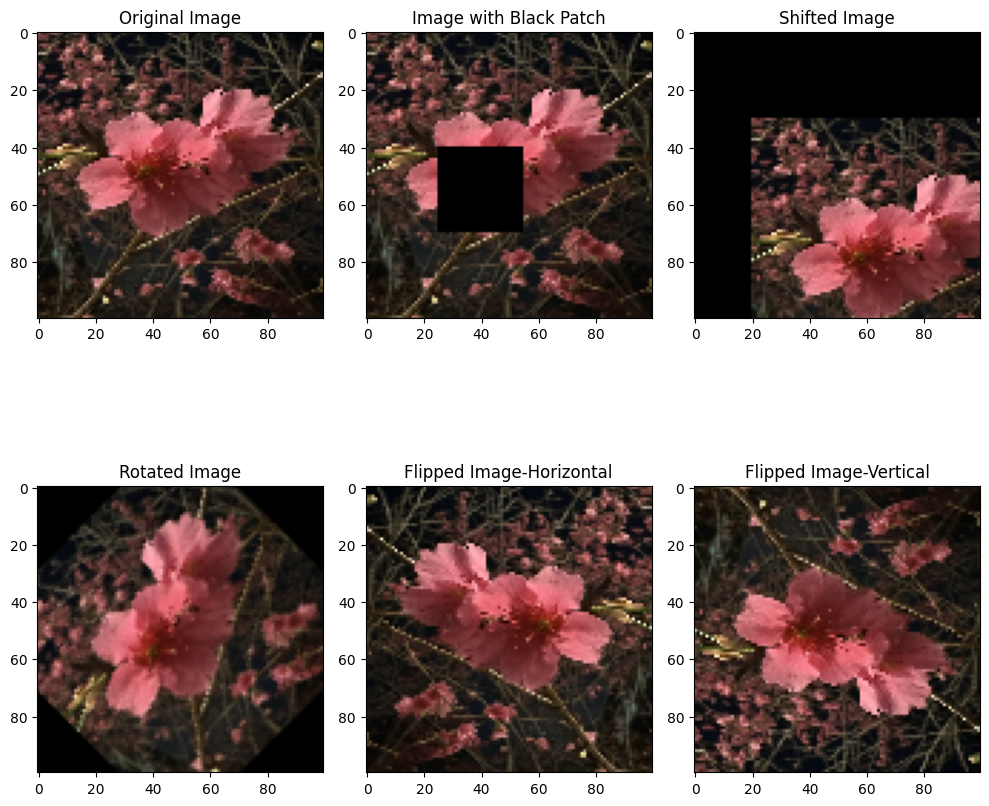

In [ ]:
sample_image = image_dataset[0]

patched_image_sample = apply_black_patch(sample_image)
shifted_image_sample = shift_image(sample_image, shift_x=20, shift_y=30)
rotated_image_sample = rotate_image(sample_image, angle=45)
flipped_horizontal_image_sample = flip_image(sample_image, direction='horizontal')
flipped_vertical_image_sample = flip_image(sample_image, direction='vertical')

# Plot the original and transformed images for comparison
plt.figure(figsize=(10, 10))

plt.subplot(2, 3, 1)
plt.imshow(sample_image)
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(patched_image_sample)
plt.title('Image with Black Patch')

plt.subplot(2, 3, 3)
plt.imshow(shifted_image_sample)
plt.title('Shifted Image')

plt.subplot(2, 3, 4)
plt.imshow(rotated_image_sample)
plt.title('Rotated Image')

plt.subplot(2, 3, 5)
plt.imshow(flipped_horizontal_image_sample)
plt.title('Flipped Image-Horizontal')

plt.subplot(2, 3, 6)
plt.imshow(flipped_vertical_image_sample)
plt.title('Flipped Image-Vertical')

plt.tight_layout()
plt.show()

**Produce a new augmented dataset with a total of at least 100 images (original images included) using the functions made in the previous action item.**

In this part, this is my defined function for the efficient production of transformed images. This utilizes all the resized images stored in the `image_dataset`. This implements a randomized parameter make the dataset more varied instead of just a uniform value.

In [ ]:
import os
import cv2
import numpy as np

# Function to generate augmented images with random parameters
def generate_augmented_images(image):

    # Save the original image as part of the augmented dataset
    augmented_images = [image.copy()]

    # Apply augmentation functions with different random parameters
    for _ in range(10):  # Generate 5 augmented versions for each original image
        # Randomly choose parameters for each augmentation function
        patch_sizeX = np.random.randint(10, 80)  # Random patch size between 10 and 50
        patch_sizeY = np.random.randint(10, 80)  # Random patch size between 10 and 50
        patch_position = (np.random.randint(0, image.shape[1] - patch_sizeX),
                          np.random.randint(0, image.shape[0] - patch_sizeY))
        shift_x = np.random.randint(-50, 50)  # Random shift between -50 and 50 pixels
        shift_y = np.random.randint(-50, 50)
        angle = np.random.randint(-180, 180)  # Random angle between -45 and 45 degrees

        # Apply augmentation functions with random parameters
        augmented_images.append(apply_black_patch(image, patch_size=(patch_sizeX, patch_sizeY), patch_position=patch_position))
        augmented_images.append(shift_image(image, shift_x=shift_x, shift_y=shift_y))
        augmented_images.append(rotate_image(image, angle=angle))

        # Randomly choose direction for flipping
        flip_direction = np.random.choice(['horizontal', 'vertical'])
        augmented_images.append(flip_image(image, direction=flip_direction))

    return augmented_images


We now loop over original images and generate augmented images using the defined function above. We might as well save all those augmented images for future use.

In [ ]:
images_generated = 0
for image in image_dataset:
    # Generate augmented images for each original image
    augmented_images = generate_augmented_images(image)

    # Save augmented images
    for i, augmented_image in enumerate(augmented_images):
        output_filename = os.path.join(AUGMENTED_OUTPUT_DIRECTORY, f"augmented_{images_generated}_{i}.jpg")
        cv2.imwrite(output_filename, cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR))
        images_generated += 1


# Guide Questions

1. **Define Data Augmentation and discuss its importance and the importance of understanding digital image processing for such an activity.**
> Data augmentation is a method used to increase the variety of data in a dataset by making changes to the existing samples. These changes can include adjusting the image’s position, size, and orientation, as well as its brightness and contrast. The main purpose of data augmentation is to make machine learning models more accurate and able to work with new, unseen data by training them with a wider range of examples.
>
> A profound comprehension of digital image processing is integral  for data augmentation, especially when working with images. This essential knowledge helps us to modify images in ways that create new, varied examples while keeping the original meaning or semantics of the data. For instance, we can rotate, shift, or flip images to show different perspectives, which helps the model learn better. Moreover, knowledge of image processing concepts allows practitioners to select appropriate augmentation techniques based on the specific characteristics of the dataset and the requirements of the machine learning task.
>
>  Within the context of this `‘Affine Transformations’` project, grasping the gist and objectives behind the manipulation of image attributes such as position, size, and orientation is more essential than the actual implementation itself. Specifically, upon completing the task, I was able to realize the following:
>
> *   **Applying a black patch** simulates occlusions, teaching the model to recognize objects even when parts of them are obscured.
> *   **Shifting an image sideways or upwards** introduces spatial variance, challenging the model to maintain object recognition across different positions.
> * **Rotating an image** helps the model learn to identify objects regardless of their orientation, which is particularly useful for real-world applications where objects may not always be upright.
> * **Flipping an image vertically or horizontally** mirrors the object, offering the model a chance to learn from a flipped perspective, akin to seeing a reflection.
>
>By applying these techniques, we can generate a set of new images that present objects from diverse perspectives and configurations with less resources required.


2. What other data augmentation techniques are applicable and not applicable to the dataset you have produced? Why?
> For this project that is mainly focused on affine transformations, which are a type of geometric transformation, the following additional data `augmentation techniques would be applicable`:
>
> * **Scaling:** Adjusting the size of the image to make it larger or smaller.
> * **Shearing:** Tilting the image in a way that changes the shape but not the area, similar to slanting the sides of a rectangle to form a parallelogram.
>
> Meanwhile, `techniques that are not applicable` are those that do not involve geometric manipulation of the image, such as:
>
>* **Color Space Augmentation:** Changing the color properties of an image, like hue, saturation, or brightness. Especially instances wherein there is a "drastic" change in brightness and contrast.
> * **Noise Injection:** Adding random pixel-level changes, which does not affect the image’s geometry.
> * **Blurring/Sharpening:** Applying filters that affect the clarity of the image. Blurring can simulate out-of-focus effects, while sharpening enhances edges.
>
> To consider an augmentation technique applicable in the context of affine transformations, it should involve `altering the spatial properties` of the image—such as its `position`, `orientation`, or `size` in such a way that is consistent with affine transformation properties. These properties include maintaining collinearity and ratios of distances between points lying on a line. Specifically, techniques that do not alter the spatial properties in this way are not considered affine transformations and thus not applicable in this specific setting. Overall, the main consideration in this specific use case is whether the technique can be represented by an affine matrix and if it preserves the geometric structure of the dataset.

```
---------End of Machine Project 2-------------
```